In [1]:
import numpy as np
import argparse
import imutils
import time
import cv2
import pandas as pd
import threading
from collections import Counter
from decimal import Decimal
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

from keras.models import load_model
from utils.preprocessor import preprocess_input

Using TensorFlow backend.


In [2]:
emotion_model_path = './models/emotion_model.hdf5'
emotion_classifier = load_model(emotion_model_path)

C:\Users\1\Anaconda3\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [3]:
image_list = []
em_list = []
for filename in glob.glob('test_new_data\kdef\KDEF (reeks A) zonder haarlijn\*.jpg'):
    em_list.append(filename[-6:-4])
    im=Image.open(filename)
    image_list.append(im)

In [4]:
em_list[:5]

['AF', 'AN', 'DI', 'HA', 'NE']

In [5]:
emotions = ['AN', 'DI', 'AF', 'HA', 'SA', 'SU', 'NE']

In [6]:
preds = []
for image in image_list:
    image = np.array(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_face = cv2.resize(gray_image, (64, 64))
    
    gray_face = preprocess_input(gray_face, True)
    gray_face = np.expand_dims(gray_face, 0)
    gray_face = np.expand_dims(gray_face, -1)
    emotion_prediction = emotion_classifier.predict(gray_face)
    emotion_probability = np.max(emotion_prediction)
    emotion_label_arg = np.argmax(emotion_prediction)
    prediction = emotions[emotion_label_arg]
    preds.append(prediction)

In [7]:
preds[:5]

['AF', 'DI', 'DI', 'HA', 'SU']

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(em_list, preds)

0.62244897959183676

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(em_list, preds)
cm

array([[15,  1,  1,  6,  1, 17, 29],
       [ 2, 23, 11,  1,  2, 31,  0],
       [ 0, 13, 47,  1,  0,  9,  0],
       [ 0,  0,  0, 69,  0,  1,  0],
       [ 6,  0,  0,  0, 21, 38,  5],
       [ 3,  0,  0,  0,  0, 66,  1],
       [ 2,  0,  0,  0,  0,  4, 64]])

In [10]:
emotionrev = emotions
reverse = emotionrev[::-1]
print(reverse)

['NE', 'SU', 'SA', 'HA', 'AF', 'DI', 'AN']


In [11]:
emotions

['AN', 'DI', 'AF', 'HA', 'SA', 'SU', 'NE']

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

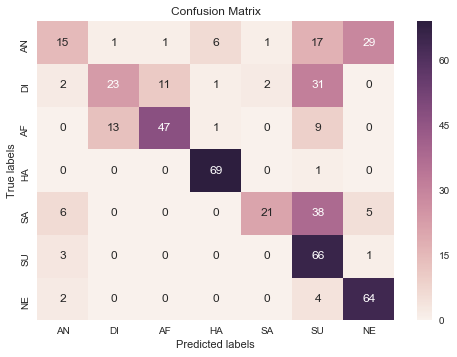

In [13]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(emotions); ax.yaxis.set_ticklabels(reverse);
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(em_list, preds, target_names=emotions))

             precision    recall  f1-score   support

         AN       0.54      0.21      0.31        70
         DI       0.62      0.33      0.43        70
         AF       0.80      0.67      0.73        70
         HA       0.90      0.99      0.94        70
         SA       0.88      0.30      0.45        70
         SU       0.40      0.94      0.56        70
         NE       0.65      0.91      0.76        70

avg / total       0.68      0.62      0.60       490

